# <font color='blue'>Avaliando modelos com diversas estruturas</font>

## Montando DRIVE

Corrigir, pelo professor, a próxima célula para o destino correto do Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

drive_dados = '/content/drive/MyDrive/UFSB/Componentes_curriculares/RNA/_02_Regressao/' # Colocar uma barra no final do endereço

## 1) Importando bibliotecas

Importar as bibliotecas e o arquivo que serão utilizadas durante as análises. 

In [ ]:
# Imports bilbliotecas básica
# ===========================
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import display, Image
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
import graphviz

# Imports bilbliotecas com funções importantes
# ============================================
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz # Exporta grafo para visualização

# modelos utilzados para regressão
# ====================================
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neural_network import MLPRegressor

# 2) Lendo os dados

In [ ]:
import pickle
# Lendo os dados de treinamento 
train_inputs, train_targets = pickle.load(open(drive_dados + 'dados_treinamento.sav', 'rb'))

# Lendo os dados de teste
test_inputs, test_targets = pickle.load(open(drive_dados + 'dados_teste.sav', 'rb')) # Final_dados_teste_Combine # Final_dados_teste_bruto
train_inputs

,Cimento (X1),Escoria de alto-forno (X2),Cinzas (X3),Agua (X4),Superplastificante (X5),Agregado grosso (X6),Agregado fino (X7),Idade (X8)
584,-1.152638,1.902274,-0.877906,0.406431,-1.097872,-0.544130,0.123332,0.716281
918,0.986763,-0.814689,-0.877906,0.318243,0.309543,0.478384,-0.528362,-0.081538
147,-0.610453,-0.814689,1.029291,-0.166300,0.097380,1.061926,0.099214,-0.081538
169,-1.044831,-0.330240,1.691211,-3.035343,0.103682,1.076383,0.109348,1.514100
349,-1.054184,0.053358,1.740922,-0.963910,0.563718,0.400841,-0.019066,-1.278267
...,...,...,...,...,...,...,...,...
636,-0.694828,2.700093,-0.877906,0.969853,-1.097872,-0.176130,-1.816356,-1.278267
838,0.383241,0.854631,-0.877906,-2.778128,0.582624,0.304898,0.646739,-0.081538
860,-1.132947,1.591435,1.646832,0.847369,0.372562,-1.692814,-1.316040,-0.081538
208,-0.611142,-0.814689,1.078845,-1.210346,0.549014,1.427297,0.358609,0.317371


In [ ]:
train_targets

,Forca de compressao do Concreto (Y1)
584,0.553352
918,0.282022
147,-0.606655
169,0.293019
349,-1.195903
...,...
636,-1.570060
838,0.625093
860,-0.231286
208,0.660595


## 3) Treinando e verificando a exatidão dos modelos
### <font color='blue'> 3.1) Regressão linear

In [ ]:
# Cria o modelo
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression
model_regress = LinearRegression(
    fit_intercept=True, 
    normalize=False, 
    copy_X=True, 
    n_jobs=None
)

# Apresentando os dados ao modelo
model_regress.fit(train_inputs,np.ravel(train_targets))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 3.1.1) Metricas para conjunto de treinamento

In [ ]:
# Avalia o modelo
train_predict_regress = model_regress.predict(train_inputs)
print ('Coeficiente R2 no conjunto de treinamento: %0.3f' %  r2_score(train_targets, train_predict_regress))
mse = mean_squared_error(train_targets,train_predict_regress)
print(f'Erro quadrático: {mse}')

Coeficiente R2 no conjunto de treinamento: 0.736
Erro quadrático: 0.26755224238784503


#### 3.1.2) Metricas para conjunto de teste

In [ ]:
test_predict_regress = model_regress.predict(test_inputs)
print ('Coeficiente R2 no conjunto de treinamento: %0.3f' %  r2_score(test_targets, test_predict_regress))
mse = mean_squared_error(test_targets, test_predict_regress)
print(f'Erro quadrático: {mse}')

Coeficiente R2 no conjunto de treinamento: 0.738
Erro quadrático: 0.24889571088253493


### <font color='blue'>3.2) Linear Support Vector Regression

In [ ]:
# Cria o modelo
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR
model_lsvr = LinearSVR(
    epsilon=0.0, 
    tol=0.0001, 
    C=1.0, 
    loss='epsilon_insensitive', # {‘epsilon_insensitive’, ‘squared_epsilon_insensitive’}, default=’epsilon_insensitive’
    fit_intercept=True, 
    intercept_scaling=1.0, 
    dual=True, 
    verbose=0, 
    random_state=None, 
    max_iter=np.int(1E8)
)

# Apresentando os dados ao modelo
model_lsvr.fit(train_inputs,np.ravel(train_targets))

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=100000000,
          random_state=None, tol=0.0001, verbose=0)

#### 3.2.1) Metricas para conjunto de treinamento

In [ ]:
# Avalia o modelo
train_predict_lsvr = model_lsvr.predict(train_inputs)
print ('Coeficiente R2 no conjunto de treinamento: %0.3f' %  r2_score(train_targets, train_predict_lsvr))
mse = mean_squared_error(train_targets,train_predict_lsvr)
print(f'Erro quadrático: {mse}')

Coeficiente R2 no conjunto de treinamento: 0.721
Erro quadrático: 0.2827578531199587


#### 3.2.2) Metricas para conjunto de teste

In [ ]:
test_predict_lsvr = model_lsvr.predict(test_inputs)
print ('Coeficiente R2 no conjunto de treinamento: %0.3f' %  r2_score(test_targets, test_predict_lsvr))
mse = mean_squared_error(test_targets, test_predict_lsvr)
print(f'Erro quadrático: {mse}')

Coeficiente R2 no conjunto de treinamento: 0.750
Erro quadrático: 0.2379987821951219


### <font color='blue'> 3.3) Epsilon-Support Vector Regression

In [ ]:
# Cria o modelo
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR
model_srv = SVR(
    kernel='rbf', 
    degree=3, 
    gamma='scale', 
    coef0=0.0, 
    tol=0.001, 
    C=1.0, 
    epsilon=0.1, 
    shrinking=True, 
    cache_size=200, 
    verbose=False, 
    max_iter=-1
)

# Apresentando os dados ao modelo
model_srv.fit(train_inputs,np.ravel(train_targets))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### 3.3.1) Metricas para conjunto de treinamento

In [ ]:
# Avalia o modelo
train_predict_srv = model_srv.predict(train_inputs)
print ('Coeficiente R2 no conjunto de treinamento: %0.3f' %  r2_score(train_targets, train_predict_srv))
mse = mean_squared_error(train_targets,train_predict_srv)
print(f'Erro quadrático: {mse}')

Coeficiente R2 no conjunto de treinamento: 0.928
Erro quadrático: 0.07280378388548227


#### 3.3.2) Metricas para conjunto de teste

In [ ]:
test_predict_srv = model_srv.predict(test_inputs)
print ('Coeficiente R2 no conjunto de treinamento: %0.3f' %  r2_score(test_targets, test_predict_srv))
mse = mean_squared_error(test_targets, test_predict_srv)
print(f'Erro quadrático: {mse}')

Coeficiente R2 no conjunto de treinamento: 0.905
Erro quadrático: 0.09029627609906633


### <font color='blue'>3.4)  Nu Support Vector Regression

In [ ]:
# Cria o modelo
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVR.html#sklearn.svm.NuSVR
model_nusrv = NuSVR(
    nu=0.5, 
    C=1.0, 
    kernel='rbf', 
    degree=3, 
    gamma='scale', 
    coef0=0.0, 
    shrinking=True, 
    tol=0.001, 
    cache_size=200, 
    verbose=False, 
    max_iter=-1
)

# Apresentando os dados ao modelo
model_nusrv.fit(train_inputs,np.ravel(train_targets))

NuSVR(C=1.0, cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, shrinking=True, tol=0.001, verbose=False)

#### 3.4.1) Metricas para conjunto de treinamento

In [ ]:
# Avalia o modelo
train_predict_nusrv = model_nusrv.predict(train_inputs)
print ('Coeficiente R2 no conjunto de treinamento: %0.3f' %  r2_score(train_targets, train_predict_nusrv))
mse = mean_squared_error(train_targets,train_predict_nusrv)
print(f'Erro quadrático: {mse}')

Coeficiente R2 no conjunto de treinamento: 0.927
Erro quadrático: 0.07404844041795407


#### 3.4.2) Metricas para conjunto de teste

In [ ]:
test_predict_nusrv = model_nusrv.predict(test_inputs)
print ('Coeficiente R2 no conjunto de treinamento: %0.3f' %  r2_score(test_targets, test_predict_nusrv))
mse = mean_squared_error(test_targets, test_predict_nusrv)
print(f'Erro quadrático: {mse}')

Coeficiente R2 no conjunto de treinamento: 0.906
Erro quadrático: 0.08897857468176337


### <font color='blue'> 3.5) Regressor KNN - Scikit-Learn

In [ ]:
# Construindo o modelo Classificador
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Range de valores de k que iremos testar
kVals = range(1, 30, 1)

# Lista vazia para receber as acurácias
acuracias = []

# Loop em todos os valores de k para testar cada um deles
for k in kVals:
    # Treinando o modelo KNN com cada valor de k
    model_knn = KNeighborsRegressor(n_neighbors = k)
    model_knn.fit(train_inputs, np.ravel(train_targets))
          
    # Avaliando o modelo e atualizando a lista de acurácias
    score = model_knn.score(test_inputs, np.ravel(test_targets))
    print("Com valor de k = %d, a acurácia é = %.2f%%" % (k, score * 100))
    acuracias.append(score)

# Obtendo o valor de k que apresentou a maior acurácia
i = np.argmax(acuracias)
print("O valor de k = %d alcançou a mais alta acurácia de %.2f%% nos dados de validação!" % (kVals[i], 
                                                                                             acuracias[i] * 100))

# Apresentando os dados ao modelo
model_knn = KNeighborsRegressor(
    n_neighbors = kVals[i],
    weights='uniform', 
    algorithm='auto', 
    leaf_size=30, 
    p=2, 
    metric='minkowski', 
    metric_params=None, 
    n_jobs=None
)
model_knn.fit(train_inputs, np.ravel(train_targets))

Com valor de k = 1, a acurácia é = 80.07%
Com valor de k = 2, a acurácia é = 81.38%
Com valor de k = 3, a acurácia é = 80.07%
Com valor de k = 4, a acurácia é = 81.41%
Com valor de k = 5, a acurácia é = 80.85%
Com valor de k = 6, a acurácia é = 79.34%
Com valor de k = 7, a acurácia é = 80.02%
Com valor de k = 8, a acurácia é = 78.64%
Com valor de k = 9, a acurácia é = 77.52%
Com valor de k = 10, a acurácia é = 77.31%
Com valor de k = 11, a acurácia é = 76.22%
Com valor de k = 12, a acurácia é = 75.97%
Com valor de k = 13, a acurácia é = 76.10%
Com valor de k = 14, a acurácia é = 75.28%
Com valor de k = 15, a acurácia é = 75.23%
Com valor de k = 16, a acurácia é = 74.74%
Com valor de k = 17, a acurácia é = 74.34%
Com valor de k = 18, a acurácia é = 73.90%
Com valor de k = 19, a acurácia é = 73.45%
Com valor de k = 20, a acurácia é = 72.86%
Com valor de k = 21, a acurácia é = 72.44%
Com valor de k = 22, a acurácia é = 71.64%
Com valor de k = 23, a acurácia é = 71.53%
Com valor de k = 24,

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

#### 3.5.1) Metricas para conjunto de treinamento

In [ ]:
# Avalia o modelo
train_predict_knn = model_knn.predict(train_inputs)
print ('Coeficiente R2 no conjunto de treinamento: %0.3f' %  r2_score(train_targets, train_predict_knn))
mse = mean_squared_error(train_targets,train_predict_knn)
print(f'Erro quadrático: {mse}')

Coeficiente R2 no conjunto de treinamento: 0.890
Erro quadrático: 0.11140070943245667


#### 3.5.2) Metricas para conjunto de teste

In [ ]:
test_predict_knn = model_knn.predict(test_inputs)
print ('Coeficiente R2 no conjunto de treinamento: %0.3f' %  r2_score(test_targets, test_predict_knn))
mse = mean_squared_error(test_targets, test_predict_knn)
print(f'Erro quadrático: {mse}')

Coeficiente R2 no conjunto de treinamento: 0.814
Erro quadrático: 0.17679138113214382


### <font color='blue'>3.6) Decision Tree Regressor

In [ ]:
# Cria o modelo
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decisiontreeregressor#sklearn.tree.DecisionTreeRegressor
model_dtr = DecisionTreeRegressor(
    criterion='mse', # {“mse”, “friedman_mse”, “mae”}, default=”mse”
    splitter='best', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=None, 
    random_state=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    min_impurity_split=None, 
    presort='deprecated', 
    ccp_alpha=0.0
)

# Apresentando os dados ao modelo
model_dtr.fit(train_inputs,np.ravel(train_targets))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# Definindo o nome do arquivo com a árvore de decisão
arquivo = 'model_dtr.dot'
labels = train_inputs.columns

In [ ]:
# Gerando o gráfico da árvore de decisão
export_graphviz(model_dtr, out_file = arquivo, feature_names = labels)
with open(arquivo) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
# Converte aquivo para png
!dot -Tpng model_dtr.dot -o model_dtr.png
display(Image(filename='model_dtr.png'))

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.58677 to fit


#### 3.6.1) Metricas para conjunto de treinamento

In [ ]:
# Avalia o modelo
train_predict_dtr = model_dtr.predict(train_inputs)
print ('Coeficiente R2 no conjunto de treinamento: %0.3f' %  r2_score(train_targets, train_predict_dtr))
mse = mean_squared_error(train_targets,train_predict_dtr)
print(f'Erro quadrático: {mse}')

Coeficiente R2 no conjunto de treinamento: 0.997
Erro quadrático: 0.0030070346653570247


#### 3.6.2) Metricas para conjunto de teste

In [ ]:
test_predict_dtr = model_dtr.predict(test_inputs)
print ('Coeficiente R2 no conjunto de treinamento: %0.3f' %  r2_score(test_targets, test_predict_dtr))
mse = mean_squared_error(test_targets, test_predict_dtr)
print(f'Erro quadrático: {mse}')

Coeficiente R2 no conjunto de treinamento: 0.862
Erro quadrático: 0.1312505815325367


#### 3.6.3) Análise da contribuição de cada atributo

In [ ]:
modelo = model_dtr
# Extraindo a importância
quant = 10 # Quantidade de maxima de indices que devem ser considerados
importances = modelo.feature_importances_
indices = np.argsort(importances)
num_indices = indices.size
quant = min(quant,num_indices)
indices = indices[num_indices-quant:num_indices]
importances = importances[indices]
indices_targets = indices
indices = np.argsort(importances)

In [ ]:
# Obtém os índices
labels = train_inputs.columns
ind=[]
for i in indices_targets:
    ind.append(labels[i])

<Figure size 432x288 with 0 Axes>

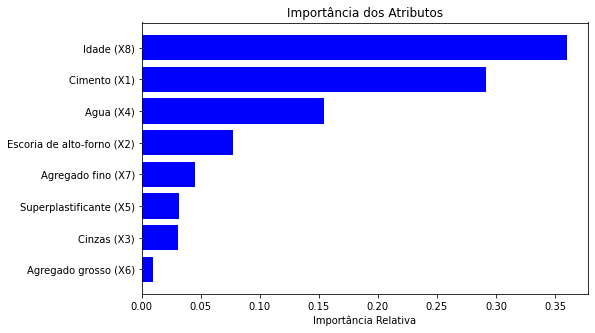

In [ ]:
# Plot da Importância dos Atributos
FIGSIZE = (8, 5)
plt.figure(1)
plt.figure(figsize = FIGSIZE)
plt.title('Importância dos Atributos')
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)),ind)
plt.xlabel('Importância Relativa')
plt.show()

### <font color='blue'>3.7) Multi-layer Perceptron (Regression)

In [ ]:
# Cria o modelo
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html?highlight=mlpregressor#sklearn.neural_network.MLPRegressor
model_mlp = MLPRegressor(
    hidden_layer_sizes=(100, ), 
    activation='relu',  # {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
    solver='adam',  # {‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
    alpha=0.0001, 
    batch_size='auto', 
    learning_rate='constant', # {‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
    learning_rate_init=0.001, 
    power_t=0.5, 
    max_iter=np.int(1E4), 
    shuffle=True, 
    random_state=None, 
    tol=0.0001, 
    verbose=False, 
    warm_start=False, 
    momentum=0.9, 
    nesterovs_momentum=True, 
    early_stopping=False, 
    validation_fraction=0.1, 
    beta_1=0.9, 
    beta_2=0.999, 
    epsilon=1e-08, 
    n_iter_no_change=10, 
    max_fun=15000
)

# Apresentando os dados ao modelo
model_mlp.fit(train_inputs,np.ravel(train_targets))

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=10000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

#### 3.7.1) Metricas para conjunto de treinamento

In [ ]:
# Avalia o modelo
train_predict_mlp = model_mlp.predict(train_inputs)
print ('Coeficiente R2 no conjunto de treinamento: %0.3f' %  r2_score(train_targets, train_predict_mlp))
mse = mean_squared_error(train_targets,train_predict_mlp)
print(f'Erro quadrático: {mse}')

Coeficiente R2 no conjunto de treinamento: 0.947
Erro quadrático: 0.05370521386939835


#### 3.7.2) Metricas para conjunto de teste

In [ ]:
test_predict_mlp = model_mlp.predict(test_inputs)
print ('Coeficiente R2 no conjunto de treinamento: %0.3f' %  r2_score(test_targets, test_predict_mlp))
mse = mean_squared_error(test_targets, test_predict_mlp)
print(f'Erro quadrático: {mse}')

Coeficiente R2 no conjunto de treinamento: 0.903
Erro quadrático: 0.09186702175473006


## 4) Definido modelo a ser analisado

In [ ]:
modelo = model_mlp

#### Metricas para conjunto de treinamento

In [ ]:
# Avalia o modelo
train_predict_modelo = modelo.predict(train_inputs)
r_quadrado = r2_score(train_targets, train_predict_modelo)
print ('Coeficiente R2 no conjunto de treinamento: %0.3f' %  r_quadrado)
mse = mean_squared_error(train_targets,train_predict_modelo)
print(f'Erro quadrático: {mse}')

Coeficiente R2 no conjunto de treinamento: 0.947
Erro quadrático: 0.05370521386939835


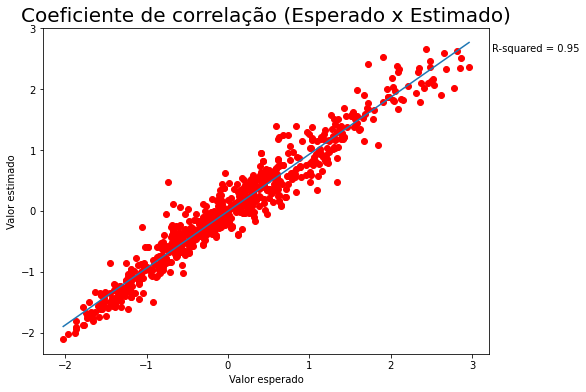

In [ ]:
Y_target_grafico = np.ravel(train_targets)
Y_pred_grafico = train_predict_modelo
# Plot
FIGSIZE = (8, 6)
fig = plt.figure(figsize = FIGSIZE)
plt.scatter(Y_target_grafico,Y_pred_grafico, c = 'r')
plt.xlabel('Valor esperado')
plt.ylabel('Valor estimado')
plt.title('Coeficiente de correlação (Esperado x Estimado)', fontsize=20)

plt.plot(np.unique(Y_target_grafico), np.poly1d(np.polyfit(Y_target_grafico, Y_pred_grafico, 1))(np.unique(Y_target_grafico)))

plt.text(1.3 * (np.max(Y_target_grafico)-np.min(Y_target_grafico))/2, 1.1 * (np.max(Y_pred_grafico)-np.min(Y_pred_grafico))/2, 'R-squared = %0.2f' % r_quadrado)
plt.show()

#### Metricas para conjunto de teste

In [ ]:
test_predict_modelo = modelo.predict(test_inputs)
r_quadrado = r2_score(test_targets, test_predict_modelo)
print ('Coeficiente R2 no conjunto de treinamento: %0.3f' % r_quadrado)
mse = mean_squared_error(test_targets, test_predict_modelo)
print(f'Erro quadrático: {mse}')

Coeficiente R2 no conjunto de treinamento: 0.903
Erro quadrático: 0.09186702175473006


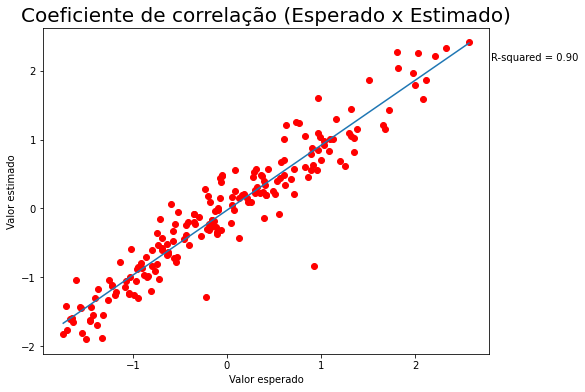

In [ ]:
Y_target_grafico = np.ravel(test_targets)
Y_pred_grafico = test_predict_modelo
# Plot
FIGSIZE = (8, 6)
fig = plt.figure(figsize = FIGSIZE)
plt.scatter(Y_target_grafico,Y_pred_grafico, c = 'r')
plt.xlabel('Valor esperado')
plt.ylabel('Valor estimado')
plt.title('Coeficiente de correlação (Esperado x Estimado)', fontsize=20)

plt.plot(np.unique(Y_target_grafico), np.poly1d(np.polyfit(Y_target_grafico, Y_pred_grafico, 1))(np.unique(Y_target_grafico)))

plt.text(1.3 * (np.max(Y_target_grafico)-np.min(Y_target_grafico))/2, 1 * (np.max(Y_pred_grafico)-np.min(Y_pred_grafico))/2, 'R-squared = %0.2f' % r_quadrado)
plt.show()